<a href="https://colab.research.google.com/github/SAVCHink2042/ML-algorithm/blob/main/binary_class%2Broc_curve(recall_precision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Бинарная классификация через метод опорных векторов, Recall, Rrecision, ROC-curve, AUC.

Датасет отсюда: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
data = pd.read_csv("binary_class.csv")

data.iloc[:,-1]= data.iloc[:,-1].replace(0, -1)
print(data)

matrix = data.iloc[:, :9]
target = data.iloc[:, 9]

x_train, x_test, y_train, y_test  = train_test_split(matrix,target, test_size = 0.25 )

model = svm.SVC(kernel ='linear')
model.fit(x_train, y_train )

print(model.coef_[0] )
print(model.intercept_[0] )


TP = 0
FN = 0
FP = 0
for i in range( len(x_test) ):
    prediction = model.predict(x_test.iloc[[i]])[0]
    if prediction == 1 and y_test.iloc[i] == 1 :
        TP += 1
    elif prediction == -1 and y_test.iloc[i] == 1:
        FN += 1
    elif prediction == 1 and y_test.iloc[i] == -1:
        FP += 1

print( "precision: ", TP/(TP+FN ) )
print( "recall: ", TP/(TP+FP) )

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1    -1
2          31         7   2    2   6    1  24   6            1    -1
3          83         4   3    4   5    1  28   6            1    -1
4         640         7   5    6   4    0  68   6            1    -1
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]
[-3.57396998e-05 -1.16545423e-02  2.76035952e-01 -6.24319771e-01
 -3.48903385e-01  7.03235955e-01  2.60658508e-03  8.45060418e-02
  1.89600107e-02]

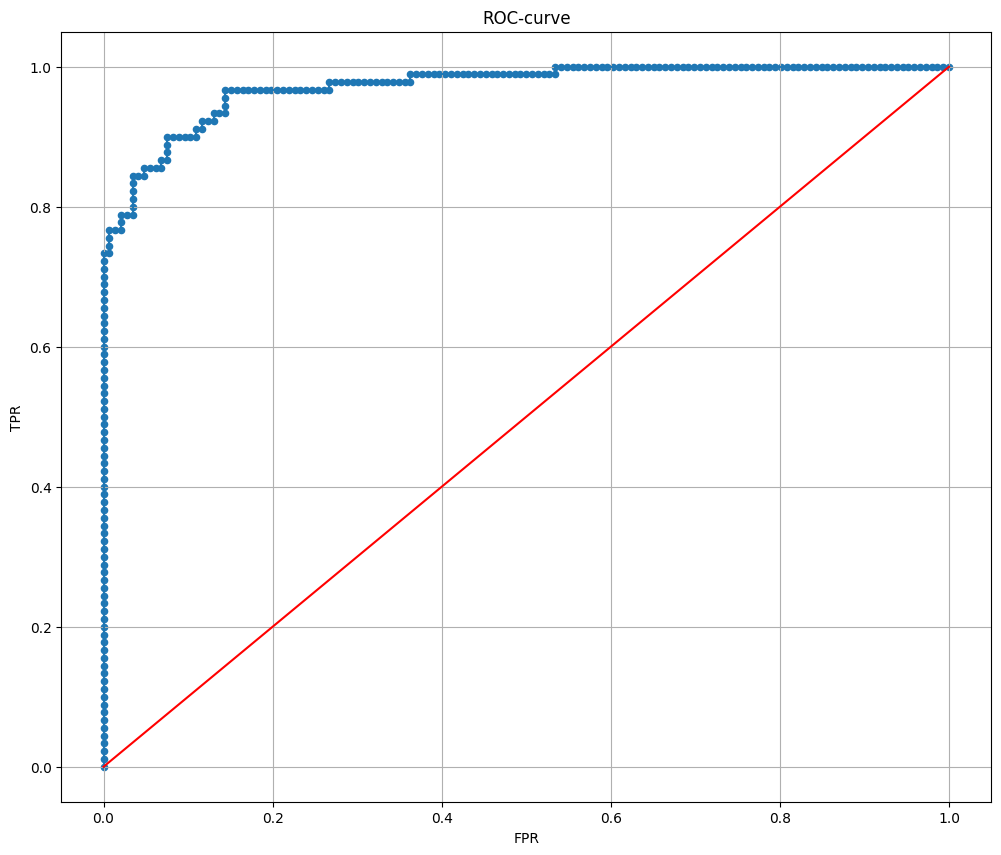

3.653664982475986 1
3.5359536418067403 1
3.4454846923607345 1
3.3842982107947694 1
3.338898282410346 1
3.244582360477521 1
3.1593023590798897 1
3.1333922281836433 1
3.1106673796825817 1
3.0894854432293446 1
3.081808247209546 1
3.080206190234785 1
3.0570416717746003 1
2.985761476954769 1
2.9618278938882696 1
2.9544084129100856 1
2.915243364238721 1
2.85448530530841 1
2.728892666326459 1
2.6866855247683983 1
2.686461107192864 1
2.681105192844006 1
2.661492915503482 1
2.6573674015523867 1
2.6548809268388798 1
2.6461969023745393 1
2.64129250145138 1
2.6096119328948326 1
2.5471783655150784 1
2.500345934163674 1
2.4910873111434526 1
2.423736292736578 1
2.4164370602638012 1
2.411349662574416 1
2.3910370377502606 1
2.384331086027249 1
2.359844961400279 1
2.3525327842287655 1
2.3072299171390647 1
2.292200215396191 1
2.2765998348890495 1
2.2626893324230597 1
2.254645702931672 1
2.1778562899861225 1
2.171898316096078 1
2.144137782012388 1
2.13457036948863 1
2.13312706311973 1
2.0469234341115516 1

In [15]:
import numpy as np

massiv = [ [np.dot(x_test.iloc[i], model.coef_[0] ) + model.intercept_[0], y_test.iloc[i]]       for i in range(len(x_test))   ]
massiv.sort(key = lambda x: -x[0] )


x = [0]
y = [0]
FP = TP = N = P = 0

for el in massiv:
    if el[1] == 1:
        P+=1
    else:
        N+=1

for el in  massiv:
    if  el[1] > 0:
        TP +=1
    else :
        FP +=1
    x.append( FP / (N) )
    y.append( TP / (P) )

plt.figure(figsize =(12, 10 ))
plt.scatter(x, y, s = 20)
plt.plot(x, y)
otrezok = np.linspace(0,1, 2)
plt.plot( otrezok, otrezok, color='red', )
plt.title('ROC-curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

for i in range(len(massiv)):
    print(massiv[i][0], massiv[i][1])
